# TP 3 Regression linéaire
### Groupe 3 | Groupe tp 15:
- Adda Redouane 
- Rahiche Messaoud 
- Krizou Amani 
- Mendil Yousra

### Importation des librairies necessaires au travail

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp


### Lecture des fichiers de données

In [39]:
data = np.genfromtxt('data.csv', delimiter=',', dtype=int)
data.shape

(100, 3)

In [40]:
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0:2]))
y = data[:, 2];

### Descente du Gradient : Préparation des fonctions

0 - Fonction Sigmoid

In [41]:
def Sigmoid(z):
    return 1/(1+exp(-z))

1 - Fonction du cout

In [42]:
def computeCost(X, y, theta):
    m = len(y)
    hyp = np.dot(X, theta)
    sigs = np.array([Sigmoid(z) for z in hyp]);
    # print(sigs)
    cost = -(1/m) * np.sum(np.dot(y,np.log(sigs)) + np.dot((1-y),np.log(1-sigs)))
    return cost

2- Fonction de la descente du gradient

In [43]:
def gradientDescent(X, y, theta, alpha, iterations):
    m = len(y)
    hyp = np.dot(X, theta)
    cost_hist = np.zeros(iterations)
    theta_history = np.zeros((iterations,3))
    sigs = np.array([Sigmoid(z) for z in hyp]);
    for i in range(iterations):
        theta = theta - alpha * ((1/m) * np.dot((sigs - y),X))
        theta_history[i,:] = theta[0]
        cost_hist[i] = computeCost(X,y,theta[0])
    return theta , theta_history, cost_hist

## Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$, $\theta_1$ et $\theta_2$

In [44]:
n=X.shape[1]
theta = np.zeros((n, 1))

Normalization des donnes:

In [45]:
def normalization(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_Norm = (X - mu)/sigma
    return X_Norm

In [46]:
X1 = normalization(X)
X1[:,0] = 1

C:\Users\user\AppData\Local\Temp\ipykernel_13488\2234019319.py:4: RuntimeWarning: invalid value encountered in true_divide
  X_Norm = (X - mu)/sigma


Calculer le cout initial

In [47]:
initialCost=computeCost(X, y, theta)
initialCost

0.6931471805599453

Appel des la fonction de calcul du gradient

In [48]:
# paramètres
iterations = 1500;
alpha = 0.01;
# Appel
theta, theta_history , cost_history = gradientDescent(X1, y, theta, alpha, iterations);
print(theta[0])

[1.5        4.21101433 3.72526809]


## Dessin de la limite de decision (Decision  Boundary)
Dans cette partie, nous aimerions dessiner la ligne separatrice d nos données

### Affichage 
Graphe representant les acceptations selon les caracteristiques

Text(0, 0.5, 'Note module 2')

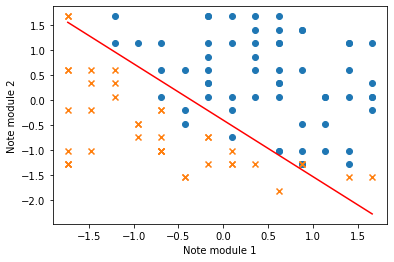

In [49]:

plt.scatter(X1[np.where(y==1),1],X1[np.where(y==1),2], label="accepte",marker ='o')
plt.scatter(X1[np.where(y==0),1],X1[np.where(y==0),2], label="non accepte",marker ='x')

x_val = np.array([np.min(X1[:,1]), np.max(X1[:,1])])
y_val = -(theta[0][0] + theta[0][1]* x_val)/theta[0][2]
plt.plot(x_val, y_val,"r")

plt.xlabel('Note module 1')
plt.ylabel('Note module 2')


<Figure size 432x288 with 0 Axes>

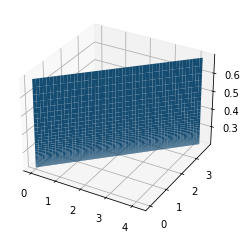

In [62]:
fig = plt.figure()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta_history[:, 1], theta_history[:,2], cost_history.reshape(-1,1))

Prédire des valeurs de y

In [51]:
x_test = np.array([9,17])
x_test = normalization(x_test)
x_test = np.append(np.ones(1),x_test)
prob = Sigmoid(x_test.dot(theta[0]))
print("pour un etudiant avec les notes 9 et 17, on predit une probabilite d'admission de : ",prob)

pour un etudiant avec les notes 9 et 17, on predit une probabilite d'admission de :  0.7338517913809698


# Vérification de l'implementation
nos algorithmes vs scikitlearn

In [57]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X, y)
x_test2 = np.array([9,17])
x_test2 = np.append(np.ones(1),x_test2)
predict = logisticRegr.predict(x_test2.reshape(1,-1))
print(f"Notre resultat : {prob>0.5}, sklearn resultat : {predict[0]>0.5}")

Notre resultat : True, sklearn resultat : True
